# Northarc, Dover Forest, Tengah LST/NDVI Analysis

Negative relationship between greenery and LST
- Analysis on the clearing of green plots for BTO construction

In [ ]:
import pandas as pd
import zipfile
import os
import geopandas as gpd
import numpy as np
from io import BytesIO
from datetime import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import hvplot.pandas
import rasterio
from pyproj import Transformer
from shapely.geometry import Point

## Filtering scenes with `x`% cloud cover

In [10]:
# List of zip file paths
zip_file_paths = [
    r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat5\L5_Metadata.zip",
    r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat7\L7_Metadata.zip",
    r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\L8_Metadata.zip",
    r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat9\L9_Metadata.zip"
]

# List to store dates and times of low cloud cover images
low_cloud_cover_dates = []

# Process each zip file
for zip_file_path in zip_file_paths:
    with zipfile.ZipFile(zip_file_path, 'r') as z:
        # List all contained files that end with .csv
        csv_files = [f for f in z.namelist() if f.endswith('.csv')]
        
        # Process each CSV file
        for csv_file in csv_files:
            with z.open(csv_file) as f:
                # Read the file into a pandas DataFrame
                df = pd.read_csv(f)
                
                # Filter data where CLOUD_COVER <= 30
                if df['CLOUD_COVER'].iloc[0] <= 30:
                    # Extract the date and time from the file name
                    date_time = os.path.basename(csv_file).split('_')[2] + '_' + os.path.basename(csv_file).split('_')[3].split('.')[0]
                    low_cloud_cover_dates.append(date_time)

# Print or return the dates for further processing
print("Dates with cloud cover <= 30%:")
for date_time in low_cloud_cover_dates:
    print(date_time)

Dates with cloud cover <= 30%:
20110214_030636
20081019_030035
20081104_030002
20101009_030639
20090328_030327
20091209_030711
20080731_030300
20070526_031101
20080426_030540
20080410_030604
20070408_031128
20061201_031111
20060304_030731
20080629_030355
20060726_030948
20050520_030357
20050504_030351
20040618_025808
20050128_030254
20040227_025537
20040720_025904
20050317_030336
20040922_030037
20041125_030153
20040330_025547
20010712_025702
20000927_025500
20040805_025923
20031123_025504
20000216_025030
20060912_031023
19990621_025432
19991011_025315
20000709_025331
19990925_025308
19980501_025348
19980125_025219
19980922_025527
19970903_024841
19990402_025520
19980226_025257
19970615_024603
20031225_025520
19960511_022728
19960730_023148
19960425_022632
19960308_022331
19990504_025518
19950525_022348
19950610_022302
19950322_022634
19940522_023602
19940130_023751
19940404_023655
19960527_022823
19920313_024047
19920703_023947
19910412_023829
19910903_024023
19910428_023845
19931026_

In [11]:
sorted(low_cloud_cover_dates)

['19900103_023927',
 '19900409_023646',
 '19900511_023652',
 '19900714_023644',
 '19900831_023629',
 '19910311_023756',
 '19910327_023812',
 '19910412_023829',
 '19910428_023845',
 '19910615_023926',
 '19910903_024023',
 '19920313_024047',
 '19920703_023947',
 '19920719_023935',
 '19920921_023837',
 '19931026_023845',
 '19940130_023751',
 '19940404_023655',
 '19940522_023602',
 '19950322_022634',
 '19950525_022348',
 '19950610_022302',
 '19960308_022331',
 '19960425_022632',
 '19960511_022728',
 '19960527_022823',
 '19960730_023148',
 '19970615_024603',
 '19970903_024841',
 '19980125_025219',
 '19980226_025257',
 '19980501_025348',
 '19980922_025527',
 '19990402_025520',
 '19990504_025518',
 '19990621_025432',
 '19990901_030935',
 '19990925_025308',
 '19991011_025315',
 '20000216_025030',
 '20000428_030856',
 '20000530_030834',
 '20000709_025331',
 '20000903_030727',
 '20000927_025500',
 '20010415_030645',
 '20010712_025702',
 '20010720_030556',
 '20020317_030527',
 '20020402_030523',


In [12]:
print(len(low_cloud_cover_dates))

238


In [13]:
# Path to the GeoJSON file
geojson_path = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\ADDRPT.geojson"

# Read the GeoJSON file
postal_gdf = gpd.read_file(geojson_path)

print(postal_gdf)

# # Path to save the CSV file
# csv_path = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\ADDRPT.csv"

# # # Save the GeoDataFrame to a CSV file, excluding the geometry column if not needed
# postal_gdf.to_csv(csv_path, index=False)

# print("GeoJSON data has been successfully saved as CSV.")

        OBJECTID_1  FEA_ID                   BUILDING_NAME HOUSE_BLK_NO  \
0          9524876  172240                            None           27   
1          9524877  180932  KAMPONG GLAM CONSERVATION AREA          707   
2          9524878  180933  KAMPONG GLAM CONSERVATION AREA          705   
3          9524879  180934  KAMPONG GLAM CONSERVATION AREA          703   
4          9524880  181470                  FRANKEL ESTATE            6   
...            ...     ...                             ...          ...   
200342     9724937  836561                        AMBER 45           45   
200343     9724938  875786                            None           89   
200344     9724939  339812                            None          338   
200345     9724940  126196                            None          340   
200346     9724941  339814                            None          340   

                ROAD_NAME POSTAL_CODE DATA_TYPE_IND MULTI_ADDR_IND   SI_NO  \
0        JURONG PORT 

In [16]:
# Getting HOUSE_BLK_NO and ROAD_NAME
northarc_gdf = postal_gdf[(postal_gdf['ROAD_NAME'] == 'CLEMENTI AVENUE 6') & (postal_gdf['BUILDING_NAME'] == 'CLEMENTI NORTHARC')]
print(northarc_gdf)

        OBJECTID_1  FEA_ID      BUILDING_NAME HOUSE_BLK_NO          ROAD_NAME  \
160282     9688672  828115  CLEMENTI NORTHARC         210A  CLEMENTI AVENUE 6   
165577     9689631  828113  CLEMENTI NORTHARC         210B  CLEMENTI AVENUE 6   
165864     9689632  828114  CLEMENTI NORTHARC          211  CLEMENTI AVENUE 6   
170064     9697634  834490  CLEMENTI NORTHARC         209A  CLEMENTI AVENUE 6   
171149     9694909  828120  CLEMENTI NORTHARC          210  CLEMENTI AVENUE 6   
173933     9694776  828112  CLEMENTI NORTHARC         209B  CLEMENTI AVENUE 6   
173935     9694778  828117  CLEMENTI NORTHARC         211A  CLEMENTI AVENUE 6   
174204     9699134  828116  CLEMENTI NORTHARC         210C  CLEMENTI AVENUE 6   
175235     9700741  828118  CLEMENTI NORTHARC          212  CLEMENTI AVENUE 6   

       POSTAL_CODE DATA_TYPE_IND MULTI_ADDR_IND  SI_NO        X_ADDR  \
160282      121210            uc              n    NaN  20172.924306   
165577      122210            uc             

In [15]:
# Getting polygons
polygons_file_path = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\SG_geojson\SG.geojson"

polygons_gdf = gpd.read_file(polygons_file_path)

print(polygons_gdf)

            osm_id   osm_type           addr_street      building  \
0       1318498382      nodes                  None           yes   
1       1318498355      nodes              Libra Dr           yes   
2       1318498304      nodes            Jupiter Rd           yes   
3       4515515260      nodes  Serangoon Garden Way   residential   
4       6475355495      nodes                  None          roof   
...            ...        ...                   ...           ...   
357578    13648334  relations                  None           yes   
357579     7653043  relations                  None           yes   
357580    13648806  relations                  None           yes   
357581    13648807  relations                  None           yes   
357582    17333823  relations         Kelantan Road  construction   

                       name access_roof building_material addr_housenumber  \
0       Adelphi Peak Estate        None              None             None   
1              

In [17]:
# Convert the 'HOUSE_BLK_NO' column to strings (if not already) and store in an array
house_blk_no_array = northarc_gdf['HOUSE_BLK_NO'].astype(str).to_list()
house_blk_no_array = np.array(house_blk_no_array)

In [18]:
# Assume house_blk_no_array is already defined as provided in previous code
# Filter the DataFrame based on the conditions
filtered_polygons = polygons_gdf[
    (polygons_gdf['addr_street'] == 'Clementi Avenue 6') &
    (polygons_gdf['addr_housenumber'].isin(house_blk_no_array))
]

# Store the 'geometry' column of the filtered DataFrame in an array
polygons_array = np.array(filtered_polygons['geometry'].tolist())

# Output the results if necessary, or proceed with additional processing
print(polygons_array)

[<POLYGON ((103.763 1.322, 103.763 1.322, 103.763 1.322, 103.763 1.322, 103.7...>
 <POLYGON ((103.763 1.323, 103.763 1.323, 103.763 1.323, 103.763 1.323, 103.7...>
 <POLYGON ((103.762 1.323, 103.762 1.323, 103.762 1.323, 103.762 1.323, 103.7...>
 <POLYGON ((103.761 1.323, 103.761 1.323, 103.761 1.323, 103.761 1.323, 103.7...>
 <POLYGON ((103.763 1.324, 103.763 1.324, 103.763 1.324, 103.763 1.324, 103.7...>
 <POLYGON ((103.763 1.324, 103.763 1.324, 103.763 1.324, 103.763 1.324, 103.7...>
 <MULTIPOLYGON (((103.763 1.322, 103.763 1.322, 103.764 1.322, 103.764 1.322,...>
 <MULTIPOLYGON (((103.762 1.323, 103.763 1.323, 103.763 1.323, 103.763 1.323,...>
 <MULTIPOLYGON (((103.764 1.323, 103.764 1.323, 103.764 1.323, 103.764 1.323,...>]


In [19]:
def preprocessing_northarc(tiff_data, filtered_polygons):
    with rasterio.open(tiff_data) as src:
        array = src.read()
        transform = src.transform
        src_crs = src.crs  # Source CRS
        dest_crs = 'EPSG:4326'  # WGS 84

        # Create a transformer object to convert from src_crs to dest_crs
        transformer = Transformer.from_crs(src_crs, dest_crs, always_xy=True)

        # Get arrays of column and row indices
        cols, rows = np.meshgrid(np.arange(array.shape[2]), np.arange(array.shape[1]))

        # Convert meshgrid arrays to coordinate arrays using rasterio's method, which are 2D
        xs, ys = rasterio.transform.xy(transform, rows, cols, offset='center')

        # Flatten the coordinate arrays to pass to transform function
        lon, lat = transformer.transform(np.array(xs).flatten(), np.array(ys).flatten())

        # Create DataFrame and convert to GeoDataFrame
        df = pd.DataFrame({'Longitude': lon, 'Latitude': lat})
        for i, band in enumerate(src.read(masked=True)):
            df[src.descriptions[i]] = band.flatten()

        gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
        gdf.set_crs('EPSG:4326', inplace=True)  # Ensure the CRS is set to WGS 84

        # Intersecting pixels
        joined_gdf = gdf.sjoin(filtered_polygons, how="inner", op='intersects', lsuffix='_left', rsuffix='_right')
        joined_gdf.rename(columns={'index_right': 'polygon', 'addr_housenumber': 'blk_no'}, inplace=True)

        columns_to_drop = ['osm_id', 'osm_type', 'building', 'name', 'access_roof', 'building_material', 'roof_material']
        joined_gdf.drop(columns=columns_to_drop, inplace=True)

        return joined_gdf

In [20]:
# Suppress specific FutureWarnings related to GeoPandas
warnings.filterwarnings("ignore", category=FutureWarning, message="The `op` parameter is deprecated")

def process_files(base_path, low_cloud_cover_dates):
    northarc_pixels_df = pd.DataFrame()
    years = sorted(set(date[:4] for date in low_cloud_cover_dates))  # Extract years from dates

    for year in years:
        zip_file_path = os.path.join(base_path, f"{year}.zip")  # Adjust as needed for actual file naming
        if os.path.exists(zip_file_path):
            with zipfile.ZipFile(zip_file_path, 'r') as z:
                print(f"Processing contents of {zip_file_path}")
                # Iterate over each file in the ZIP
                for file in z.namelist():
                    # Check each date explicitly
                    for date in low_cloud_cover_dates:
                        if file.endswith('.tif') and date in file:
                            print(file)
                            print(f"Matching file found: {file} for date {date}")
                            with z.open(file) as tiff:
                                # Extract the date part from the date string
                                date_str = date[:8]  # Extract YYYYMMDD part only
                                # Process the TIFF file with the preprocessing function
                                pixels = preprocessing_northarc(BytesIO(tiff.read()), filtered_polygons)
                                print("Number of pixels in NORTHARC: " + str(len(pixels)))
                                # Convert date string to datetime object
                                pixels['time'] = datetime.strptime(date_str, "%Y%m%d")
                                northarc_pixels_df = pd.concat([northarc_pixels_df, pixels], ignore_index=True)
                            print(f"Processed TIFF: {file}")
                            break  # Stop checking other dates if a match is found
        else:
            print(f"ZIP file for {year} does not exist: {zip_file_path}")

    return northarc_pixels_df

# Paths for Landsat 8 and Landsat 9
base_path_L8 = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8"
base_path_L9 = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat9"

# Process files for both Landsat 8 and Landsat 9
northarc_pixels_L8 = process_files(base_path_L8, low_cloud_cover_dates)
northarc_pixels_L9 = process_files(base_path_L9, low_cloud_cover_dates)

# Combine the data from both satellites
northarc_pixels_df = pd.concat([northarc_pixels_L8, northarc_pixels_L9], ignore_index=True)
print("Processing complete. Number of processed pixels:", len(northarc_pixels_df))

ZIP file for 1990 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1990.zip
ZIP file for 1991 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1991.zip
ZIP file for 1992 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1992.zip
ZIP file for 1993 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1993.zip
ZIP file for 1994 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1994.zip
ZIP file for 1995 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1995.zip
ZIP file for 1996 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1996.zip
ZIP file for 1997 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1997.zip
ZIP file for 1998 does not exist: C:\LocalOneDri

In [24]:
northarc_pixels_df.to_csv(r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\Northarc_cc30_latest.csv")

In [29]:
def plot_yearly_avg_lst_ndvi(filepath, region_name):
    # Read the data
    pixels_df = pd.read_csv(filepath)

    # Define the filtering values
    qa_pixel_filter = [5504, 5506, 54534, 54790, 22280, 5896, 55052, 7440, 7696, 23826, 56854, 24082, 56598, 7698, 7442, 54596, 54852, 24144, 23888, 56660, 56916]
    sr_qa_aerosol_filter = [192, 194, 196, 224, 228]

    pixels_df['time'] = pd.to_datetime(pixels_df['time'])

    # pixels_df = pixels_df[pixels_df['time'] >= pd.Timestamp('2016-01-01')]

    # qa_pixel_filter_2 = [5504, 5506, 22280, 5896, 55052, 7440, 7696, 23826, 56854, 24082, 56598, 7698, 7442, 54596, 24144, 23888, 56660, 56916]
    # sr_qa_aerosol_filter_2 = [192, 194, 196]

    # # Filter data
    pixels_df = pixels_df[~pixels_df['QA_PIXEL'].isin(qa_pixel_filter)]
    pixels_df = pixels_df[~pixels_df['SR_QA_AEROSOL'].isin(sr_qa_aerosol_filter)]

    # Convert ST_B10 from digital numbers to Celsius
    pixels_df['LST_Celsius'] = (pixels_df['ST_B10'] * 0.00341802 + 149) - 273.15

    # Scale SR_B4 and SR_B5
    scale = 2.75e-05
    offset = -0.2
    pixels_df['SR_B4_Scaled'] = (pixels_df['SR_B4'] * scale) + offset
    pixels_df['SR_B5_Scaled'] = (pixels_df['SR_B5'] * scale) + offset

    # Calculate NDVI using scaled values
    pixels_df['NDVI'] = (pixels_df['SR_B5_Scaled'] - pixels_df['SR_B4_Scaled']) / (pixels_df['SR_B5_Scaled'] + pixels_df['SR_B4_Scaled'])

    # Convert time to datetime and extract year
    pixels_df['year'] = pixels_df['time'].dt.year

    print(pixels_df.groupby('year')['NDVI'].mean())
    print(pixels_df.groupby('year')['LST_Celsius'].mean())

    # Create a figure and a set of subplots
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot LST on the first y-axis
    color = 'tab:red'
    ax1.set_xlabel('Year', fontsize=15)
    ax1.set_ylabel('Land Surface Temperature (°C)', color=color, fontsize=15)
    lst_plot = sns.lineplot(data=pixels_df, x='year', y='LST_Celsius', marker='o', sort=False, ax=ax1, color=color)
    ax1.tick_params(axis='x', labelsize=15)
    ax1.tick_params(axis='y', labelcolor=color, labelsize=15)
    lst_plot.set_xticklabels(lst_plot.get_xticklabels(), rotation=45, ha='right')

    # Create a second y-axis for NDVI with shared x-axis
    ax2 = ax1.twinx()
    color = 'tab:green'
    ax2.set_ylabel('NDVI', color=color, fontsize=15)
    ndvi_plot = sns.lineplot(data=pixels_df, x='year', y='NDVI', marker='o', sort=False, ax=ax2, color=color)
    ax2.tick_params(axis='y', labelcolor=color, labelsize=15)

    # Title and layout adjustments
    plt.title('Relationship between NDVI and LST at ' + region_name)
    fig.tight_layout()

    # Show the plot
    plt.show()

year
2014    0.523141
2015    0.693360
2017    0.577414
2018    0.122150
2020    0.115649
Name: NDVI, dtype: float64
year
2014    38.083303
2015    35.955184
2017    38.137590
2018    42.415613
2020    40.253686
Name: LST_Celsius, dtype: float64


C:\Users\teomi\AppData\Local\Temp\ipykernel_31096\1367324568.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  lst_plot.set_xticklabels(lst_plot.get_xticklabels(), rotation=45, ha='right')


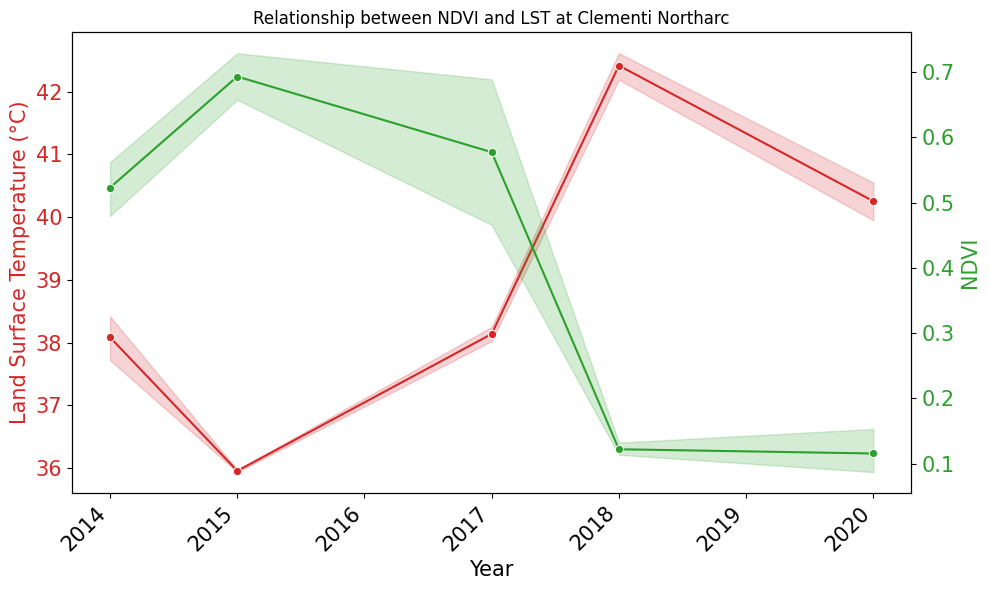

In [30]:
plot_yearly_avg_lst_ndvi(r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\Northarc_cc30_latest.csv", "Clementi Northarc")

# Dover Forest

In [ ]:
# Source: https://doverforest.sg/
# Started clearing the east portion late 2022 to early 2023

In [15]:
def get_node_coordinates(node_ids):
    url = "http://overpass-api.de/api/interpreter"
    query = f"""
    [out:json];
    (node(id:{','.join(map(str, node_ids))}););
    out;
    """
    response = requests.get(url, params={'data': query})
    data = response.json()
    coordinates = [{'lon': node['lon'], 'lat': node['lat']} for node in data['elements']]
    return coordinates

regions = {
    "Dover Forest West": [
            1345709528, 1345709530, 1345709541, 5406526739, 1345709534, 1345709531, 1345709536, 1345709537,
            1345709540, 11395931499, 11395931495, 11395931498, 11395931497, 11395931500, 11395931494,
            1345709535, 1345709529, 1345709532, 1843468973, 1843468971, 1345709528
    ],
    "Ulu Pandan Vista": [
        3838403275, 11395931474, 11395931475, 11395931476, 11395931477, 11395931478, 5365660959, 5365660965, 
        11395931496, 1345709540, 11395931499, 11395931495, 11395931498, 11395931497, 11395931500, 11395931494, 
        11395931479, 11395931480, 11395931481, 11395931482, 11395931483, 11395931484, 11395931485, 11395931486, 
        11395931487, 11395931488, 11395931489, 11395931490, 11395931491, 11395931492, 11395931493, 3838403276, 
        10197447636, 10197447637, 10197447638, 10197447640, 11001568400, 11001568399, 10197447639, 3838403282, 3838403275
    ],
    "Ulu Pandan Banks": [
        3838403282, 10197447645, 10197447644, 10197447643, 10197447635, 10197447641, 10197447636, 10197447637, 
        10197447638, 10197447640, 11001568400, 11001568399, 10197447639, 3838403282
    ],
    "Ulu Pandan Glades": [
        11001568396, 11001568397, 11001568392, 11001568391, 11001568390, 11001568389, 11001568388, 11001568387, 
        11001568386, 11001568385, 11001568384, 11001568383, 11001568382, 11001568381, 11001568380, 11001568379, 11001568396
    ]
}

# Create a GeoDataFrame to store polygons with regions
polygons_data = []

for region, nodes in regions.items():
    coordinates = get_node_coordinates(nodes)
    # Create points directly in GeoDataFrame constructor
    points = gpd.points_from_xy([coord['lon'] for coord in coordinates], [coord['lat'] for coord in coordinates])
    gdf = gpd.GeoDataFrame(coordinates, geometry=points)
    polygon = gpd.GeoDataFrame({'region': [region], 'geometry': [gdf.unary_union.convex_hull]})

    polygons_data.append(polygon)

# Concatenate all regional polygons into a single GeoDataFrame
dover_forest_polygons_df = pd.concat(polygons_data)

# Plotting all regions on a single map using hvPlot
plot = dover_forest_polygons_df.hvplot(geo=True, tiles='OSM', frame_width=700, frame_height=500, color='green', line_color='black', alpha=0.5)

plot

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]

In [19]:
dover_forest_polygons_df.set_crs("EPSG:4326", inplace=True)
print(dover_forest_polygons_df)

              region                                           geometry
0  Dover Forest West  POLYGON ((103.77717 1.31257, 103.77500 1.31267...
0   Ulu Pandan Vista  POLYGON ((103.78089 1.31031, 103.77636 1.31270...
0   Ulu Pandan Banks  POLYGON ((103.78160 1.30986, 103.78089 1.31031...
0  Ulu Pandan Glades  POLYGON ((103.78304 1.30914, 103.78297 1.30915...


In [16]:
def preprocessing_dover(tiff_data, filtered_polygons):
    with rasterio.open(tiff_data) as src:
        array = src.read()
        transform = src.transform
        src_crs = src.crs  # Source CRS
        dest_crs = 'EPSG:4326'  # WGS 84

        # Create a transformer object to convert from src_crs to dest_crs
        transformer = Transformer.from_crs(src_crs, dest_crs, always_xy=True)

        # Get arrays of column and row indices
        cols, rows = np.meshgrid(np.arange(array.shape[2]), np.arange(array.shape[1]))

        # Convert meshgrid arrays to coordinate arrays using rasterio's method, which are 2D
        xs, ys = rasterio.transform.xy(transform, rows, cols, offset='center')

        # Flatten the coordinate arrays to pass to transform function
        lon, lat = transformer.transform(np.array(xs).flatten(), np.array(ys).flatten())

        # Create DataFrame and convert to GeoDataFrame
        df = pd.DataFrame({'Longitude': lon, 'Latitude': lat})
        for i, band in enumerate(src.read(masked=True)):
            df[src.descriptions[i]] = band.flatten()

        gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
        gdf.set_crs('EPSG:4326', inplace=True)  # Ensure the CRS is set to WGS 84

        # Intersecting pixels
        joined_gdf = gdf.sjoin(filtered_polygons, how="inner", op='intersects', lsuffix='_left', rsuffix='_right')
        joined_gdf.rename(columns={'index_right': 'polygon'}, inplace=True)

        return joined_gdf

In [20]:
# Suppress specific FutureWarnings related to GeoPandas
warnings.filterwarnings("ignore", category=FutureWarning, message="The `op` parameter is deprecated")

def process_files(base_path, low_cloud_cover_dates):
    dover_forest_pixels = pd.DataFrame()
    years = sorted(set(date[:4] for date in low_cloud_cover_dates))  # Extract years from dates

    for year in years:
        zip_file_path = os.path.join(base_path, f"{year}.zip")  # Adjust as needed for actual file naming
        if os.path.exists(zip_file_path):
            with zipfile.ZipFile(zip_file_path, 'r') as z:
                print(f"Processing contents of {zip_file_path}")
                # Iterate over each file in the ZIP
                for file in z.namelist():
                    # Check each date explicitly
                    for date in low_cloud_cover_dates:
                        if file.endswith('.tif') and date in file:
                            print(file)
                            print(f"Matching file found: {file} for date {date}")
                            with z.open(file) as tiff:
                                # Extract the date part from the date string
                                date_str = date[:8]  # Extract YYYYMMDD part only
                                # Process the TIFF file with the preprocessing function
                                pixels = preprocessing_dover(BytesIO(tiff.read()), dover_forest_polygons_df)
                                print("Number of pixels in DOVER FOREST: " + str(len(pixels)))
                                # Convert date string to datetime object
                                pixels['time'] = datetime.strptime(date_str, "%Y%m%d")
                                dover_forest_pixels = pd.concat([dover_forest_pixels, pixels], ignore_index=True)
                            print(f"Processed TIFF: {file}")
                            break  # Stop checking other dates if a match is found
        else:
            print(f"ZIP file for {year} does not exist: {zip_file_path}")

    return dover_forest_pixels

# Paths for Landsat 8 and Landsat 9
base_path_L8 = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8"
base_path_L9 = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat9"

# Process files for both Landsat 8 and Landsat 9
dover_forest_pixels_L8 = process_files(base_path_L8, low_cloud_cover_dates)
dover_forest_pixels_L9 = process_files(base_path_L9, low_cloud_cover_dates)

# Combine the data from both satellites
dover_forest_pixels_df = pd.concat([dover_forest_pixels_L8, dover_forest_pixels_L9], ignore_index=True)
print("Processing complete. Number of processed pixels:", len(dover_forest_pixels_L9))

ZIP file for 1990 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1990.zip
ZIP file for 1991 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1991.zip
ZIP file for 1992 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1992.zip
ZIP file for 1993 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1993.zip
ZIP file for 1994 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1994.zip
ZIP file for 1995 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1995.zip
ZIP file for 1996 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1996.zip
ZIP file for 1997 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1997.zip
ZIP file for 1998 does not exist: C:\LocalOneDri

In [21]:
dover_forest_pixels_df.to_csv(r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\DoverForest_cc30.csv")

In [40]:
dover_forest_pixels_df = pd.read_csv(r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\DoverForest_cc30.csv")

In [53]:
def plot_yearly_avg_lst_ndvi_dover(filepath):
    # Read the data
    pixels_df = pd.read_csv(filepath)

    pixels_df = pixels_df[pixels_df['region'] != 'Dover Forest West']

    pixels_df['time'] = pd.to_datetime(pixels_df['time'])

    pixels_df = pixels_df[pixels_df['time'] >= pd.Timestamp('2022-01-01')]

    # print(pixels_df[(pixels_df['time'] >= pd.Timestamp('2021-01-01')) & (pixels_df['time'] <= pd.Timestamp('2021-12-31'))])

    # Define the filtering values
    qa_pixel_filter = [5504, 5506, 54534, 54790, 22280, 5896, 55052, 7440, 7696, 23826, 56854, 24082, 56598, 7698, 7442, 54596, 54852, 24144, 23888, 56660, 56916]
    sr_qa_aerosol_filter = [192, 194, 196, 224, 228]

    # qa_pixel_filter_2 = [5504, 5506, 22280, 5896, 55052, 7440, 7696, 23826, 56854, 24082, 56598, 7698, 7442, 54596, 24144, 23888, 56660, 56916]
    # sr_qa_aerosol_filter_2 = [192, 194, 196]

    # # Filter data
    pixels_df = pixels_df[~pixels_df['QA_PIXEL'].isin(qa_pixel_filter)]
    pixels_df = pixels_df[~pixels_df['SR_QA_AEROSOL'].isin(sr_qa_aerosol_filter)]

    # Convert ST_B10 from digital numbers to Celsius
    pixels_df['LST_Celsius'] = (pixels_df['ST_B10'] * 0.00341802 + 149) - 273.15

    # Scale SR_B4 and SR_B5
    scale = 2.75e-05
    offset = -0.2
    pixels_df['SR_B4_Scaled'] = (pixels_df['SR_B4'] * scale) + offset
    pixels_df['SR_B5_Scaled'] = (pixels_df['SR_B5'] * scale) + offset

    # Calculate NDVI using scaled values
    pixels_df['NDVI'] = (pixels_df['SR_B5_Scaled'] - pixels_df['SR_B4_Scaled']) / (pixels_df['SR_B5_Scaled'] + pixels_df['SR_B4_Scaled'])

    # Convert time to datetime and extract year
    pixels_df['year'] = pixels_df['time'].dt.year.astype(str)

    print(pixels_df.groupby('year')['NDVI'].mean())
    print(pixels_df.groupby('year')['LST_Celsius'].mean())

    # Create a figure and a set of subplots
    fig, ax1 = plt.subplots(figsize=(9, 6))

    # Plot LST on the first y-axis
    color = 'tab:red'
    ax1.set_xlabel('Year', fontsize=15)
    ax1.set_ylabel('Land Surface Temperature (°C)', color=color, fontsize=15)
    lst_plot = sns.lineplot(data=pixels_df, x='year', y='LST_Celsius', marker='o', sort=False, ax=ax1, color=color)
    ax1.tick_params(axis='y', labelcolor=color, labelsize=15)
    ax1.tick_params(axis='x', labelsize=15)
    lst_plot.set_xticklabels(lst_plot.get_xticklabels(), rotation=45, ha='right')

    # Create a second y-axis for NDVI with shared x-axis
    ax2 = ax1.twinx()
    color = 'tab:green'
    ax2.set_ylabel('NDVI', color=color, fontsize=15)
    ndvi_plot = sns.lineplot(data=pixels_df, x='year', y='NDVI', marker='o', sort=False, ax=ax2, color=color)
    ax2.tick_params(axis='y', labelcolor=color, labelsize=15)

    # Title and layout adjustments
    plt.title('Relationship between NDVI and LST at Dover Forest East')
    fig.tight_layout()

    # Show the plot
    plt.show()

year
2022    0.893138
2023    0.612588
2024    0.466807
Name: NDVI, dtype: float64
year
2022    34.477574
2023    36.461648
2024    38.554930
Name: LST_Celsius, dtype: float64


C:\Users\teomi\AppData\Local\Temp\ipykernel_31096\4151659028.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  lst_plot.set_xticklabels(lst_plot.get_xticklabels(), rotation=45, ha='right')


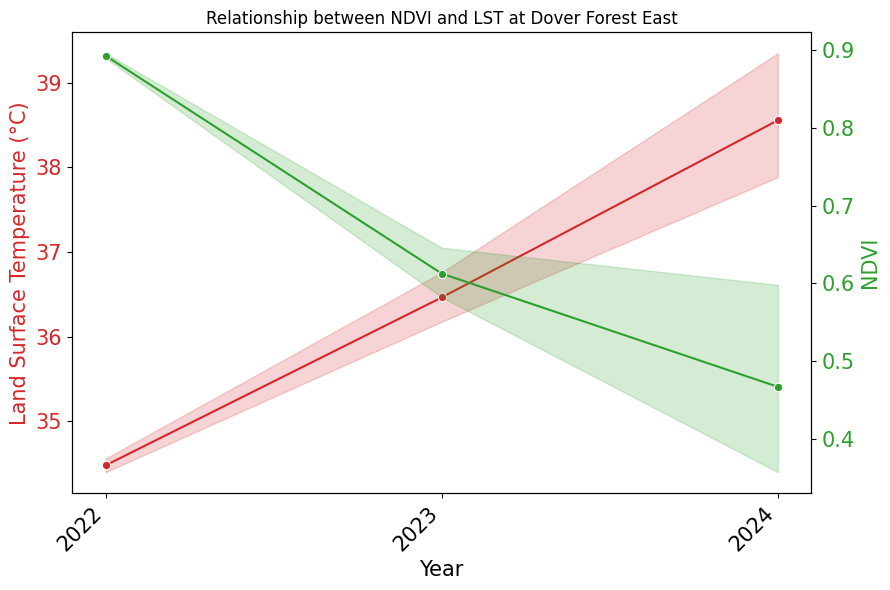

In [54]:
plot_yearly_avg_lst_ndvi_dover(r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\DoverForest_cc30.csv")

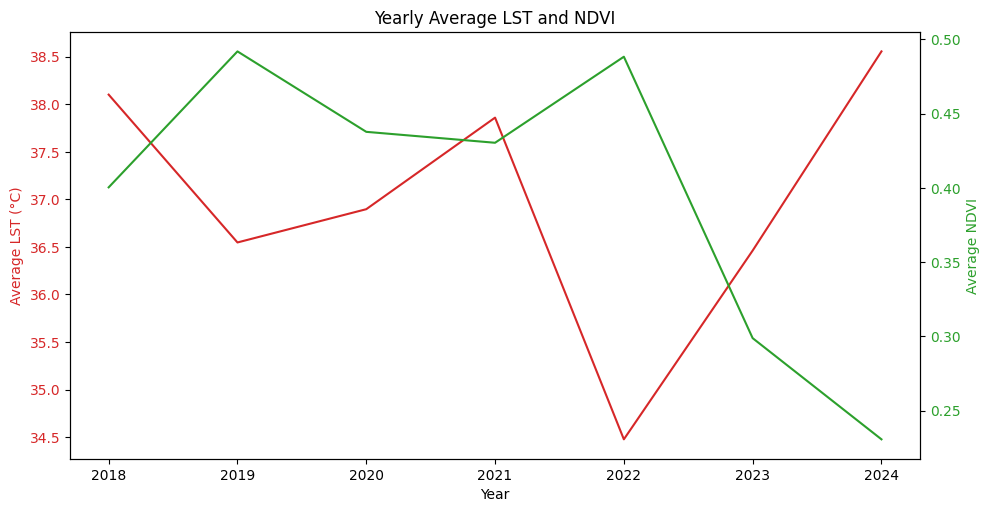

In [106]:
# USING MATPLOTLIB
# Define the filtering values
qa_pixel_filter_1 = [5504, 5506, 54534, 54790, 22280, 5896, 55052, 7440, 7696, 23826, 56854, 24082, 56598, 7698, 7442, 54596, 54852, 24144, 23888, 56660, 56916]
sr_qa_aerosol_filter_1 = [192, 194, 196, 224, 228]

dover_forest_pixels_df_filtered = dover_forest_pixels_df[dover_forest_pixels_df['region'] != 'Dover Forest West']

dover_forest_pixels_df_filtered = dover_forest_pixels_df_filtered[dover_forest_pixels_df_filtered['time'] >= pd.Timestamp('2018-01-01')]

# Filter out unwanted 'QA_PIXEL' values
dover_forest_pixels_df_filtered = dover_forest_pixels_df_filtered[~dover_forest_pixels_df_filtered['QA_PIXEL'].isin(qa_pixel_filter_1)]

# Further filter out unwanted 'SR_QA_AEROSOL' values
dover_forest_pixels_df_filtered = dover_forest_pixels_df_filtered[~dover_forest_pixels_df_filtered['SR_QA_AEROSOL'].isin(sr_qa_aerosol_filter_1)]

# Convert 'ST_B10' from digital numbers to Celsius (assuming 'ST_B10' represents band 10 temperature in Kelvin)
dover_forest_pixels_df_filtered['LST_Celsius'] = (dover_forest_pixels_df_filtered['ST_B10'] * 0.00341802 + 149) - 273.15

# Scale and offset values for SR_B4 (Near Infrared) and SR_B5 (Shortwave Infrared 1)
scale = 2.75e-05
offset = -0.2

# Apply scale and offset to the bands
dover_forest_pixels_df_filtered['SR_B4_Scaled'] = (dover_forest_pixels_df_filtered['SR_B4'] * scale) + offset
dover_forest_pixels_df_filtered['SR_B5_Scaled'] = (dover_forest_pixels_df_filtered['SR_B5'] * scale) + offset

# Calculate NDVI using the scaled values
dover_forest_pixels_df_filtered['NDVI'] = (
    (dover_forest_pixels_df_filtered['SR_B5_Scaled'] - dover_forest_pixels_df_filtered['SR_B4_Scaled']) / 
    (dover_forest_pixels_df_filtered['SR_B5_Scaled'] + dover_forest_pixels_df_filtered['SR_B4_Scaled'])
)

# Calculate NDVI using bands 4 and 5
dover_forest_pixels_df_filtered['NDVI'] = (dover_forest_pixels_df_filtered['SR_B5'] - dover_forest_pixels_df_filtered['SR_B4']) / (dover_forest_pixels_df_filtered['SR_B5'] + dover_forest_pixels_df_filtered['SR_B4'])

# Extract year from 'time' for grouping
dover_forest_pixels_df_filtered['year'] = dover_forest_pixels_df_filtered['time'].dt.year
# dover_forest_pixels_df_filtered['time'] = dover_forest_pixels_df_filtered['time'].dt.date

# Calculate yearly average LST and NDVI
yearly_avg = dover_forest_pixels_df_filtered.groupby('year').agg({
    'LST_Celsius': 'mean',
    'NDVI': 'mean'
}).reset_index()

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 5))

# Axis 1 - LST
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Average LST (°C)', color=color)
ax1.plot(yearly_avg['year'], yearly_avg['LST_Celsius'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Axis 2 - NDVI
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Average NDVI', color=color) 
ax2.plot(yearly_avg['year'], yearly_avg['NDVI'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Yearly Average LST and NDVI')
plt.show()

# Dover Forest (East) was cleared in late 2022 to early 2023
# Plot from 2018 onwards, zoom into individual months

In [ ]:
def preprocessing_dover(tiff_data, filtered_polygons):
    with rasterio.open(tiff_data) as src:
        array = src.read()
        transform = src.transform
        src_crs = src.crs  # Source CRS
        dest_crs = 'EPSG:4326'  # WGS 84

        # Create a transformer object to convert from src_crs to dest_crs
        transformer = Transformer.from_crs(src_crs, dest_crs, always_xy=True)

        # Get arrays of column and row indices
        cols, rows = np.meshgrid(np.arange(array.shape[2]), np.arange(array.shape[1]))

        # Convert meshgrid arrays to coordinate arrays using rasterio's method, which are 2D
        xs, ys = rasterio.transform.xy(transform, rows, cols, offset='center')

        # Flatten the coordinate arrays to pass to transform function
        lon, lat = transformer.transform(np.array(xs).flatten(), np.array(ys).flatten())

        # Create DataFrame and convert to GeoDataFrame
        df = pd.DataFrame({'Longitude': lon, 'Latitude': lat})
        for i, band in enumerate(src.read(masked=True)):
            df[src.descriptions[i]] = band.flatten()

        gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
        gdf.set_crs('EPSG:4326', inplace=True)  # Ensure the CRS is set to WGS 84

        # Intersecting pixels
        joined_gdf = gdf.sjoin(filtered_polygons, how="inner", op='intersects', lsuffix='_left', rsuffix='_right')
        joined_gdf.rename(columns={'index_right': 'polygon'}, inplace=True)

        return joined_gdf

In [ ]:
# Suppress specific FutureWarnings related to GeoPandas
warnings.filterwarnings("ignore", category=FutureWarning, message="The `op` parameter is deprecated")

def process_files(base_path, low_cloud_cover_dates):
    dover_forest_pixels = pd.DataFrame()
    years = sorted(set(date[:4] for date in low_cloud_cover_dates))  # Extract years from dates

    for year in years:
        zip_file_path = os.path.join(base_path, f"{year}.zip")  # Adjust as needed for actual file naming
        if os.path.exists(zip_file_path):
            with zipfile.ZipFile(zip_file_path, 'r') as z:
                print(f"Processing contents of {zip_file_path}")
                # Iterate over each file in the ZIP
                for file in z.namelist():
                    # Check each date explicitly
                    for date in low_cloud_cover_dates:
                        if file.endswith('.tif') and date in file:
                            print(file)
                            print(f"Matching file found: {file} for date {date}")
                            with z.open(file) as tiff:
                                # Extract the date part from the date string
                                date_str = date[:8]  # Extract YYYYMMDD part only
                                # Process the TIFF file with the preprocessing function
                                pixels = preprocessing_dover(BytesIO(tiff.read()), dover_forest_polygons_df)
                                print("Number of pixels in DOVER FOREST: " + str(len(pixels)))
                                # Convert date string to datetime object
                                pixels['time'] = datetime.strptime(date_str, "%Y%m%d")
                                dover_forest_pixels = pd.concat([dover_forest_pixels, pixels], ignore_index=True)
                            print(f"Processed TIFF: {file}")
                            break  # Stop checking other dates if a match is found
        else:
            print(f"ZIP file for {year} does not exist: {zip_file_path}")

    return dover_forest_pixels

# Paths for Landsat 8 and Landsat 9
base_path_L8 = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8"
base_path_L9 = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat9"

# Process files for both Landsat 8 and Landsat 9
dover_forest_pixels_L8 = process_files(base_path_L8, low_cloud_cover_dates)
dover_forest_pixels_L9 = process_files(base_path_L9, low_cloud_cover_dates)

# Combine the data from both satellites
northarc_pixels_df = pd.concat([dover_forest_pixels_L8, dover_forest_pixels_L9], ignore_index=True)
print("Processing complete. Number of processed pixels:", len(northarc_pixels_df))

ZIP file for 1990 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1990.zip
ZIP file for 1991 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1991.zip
ZIP file for 1992 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1992.zip
ZIP file for 1993 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1993.zip
ZIP file for 1994 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1994.zip
ZIP file for 1995 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1995.zip
ZIP file for 1996 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1996.zip
ZIP file for 1997 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1997.zip
ZIP file for 1998 does not exist: C:\LocalOneDri

c:\Users\teomi\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\geodataframe.py:2195: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  return geopandas.sjoin(left_df=self, right_df=df, *args, **kwargs)  # noqa: B026


Number of pixels in NORTHARC: 377


UnboundLocalError: local variable 'dover_forest_pixels' referenced before assignment

# Tengah

In [ ]:
# Filter out Tengah Blocks

# Plantation Grove
# Plantation Village
# Plantation Acres
# Plantation Creek
# Plantation Grange
# Parc Clover @ Tengah 
# Parc Glen @ Tengah 
# Parc Flora @ Tengah
# Parc Residences @ Tengah
# Parc Woods @ Tengah
# Garden Vale @ Tengah
# Garden Vines @ Tengah
# Garden Bloom @ Tengah
# Garden Court @ Tengah
# Garden Terrace @ Tengah
# Copen Grand

# Garden Waterfront I and II are not built yet

In [74]:
def get_node_coordinates(node_ids):
    url = "http://overpass-api.de/api/interpreter"
    query = f"""
    [out:json];
    (node(id:{','.join(map(str, node_ids))}););
    out;
    """
    response = requests.get(url, params={'data': query})
    data = response.json()
    coordinates = [{'lon': node['lon'], 'lat': node['lat']} for node in data['elements']]
    return coordinates

regions = {
    "Copen Grand" : [
    11165133401, 11166349367, 11166349366, 11166349365, 11166349364,
    11166349363, 11166349362, 11166349361, 11166349360, 11166349359,
    11166349358, 11166349357, 11166349356, 11166349355, 11166349354,
    11166349353, 11166349352, 11166349351, 11166349350, 11166349349,
    11166349348, 11166349347, 11165133400, 11165133401
    ],
    
    "Onboard@Tengah" : [
    7157592216, 11166349343, 11166349344, 11166349346, 11166349345,
    1252313794, 7157592219, 7157592262, 7157592216
    ], 
    
    "Tengah Bus Interchange": [
    11811173225, 11811173226, 11811173227, 11811173228, 11811173229,
    11811173230, 11977196820, 11811173231, 11811173232, 11811173233,
    11811173234, 11811173235, 11811173236, 11811173237, 11811173238,
    11811173239, 11811173240, 11811173241, 11811173242, 11811173243,
    11811173244, 11811173225
    ], 

    "Tengah Bus Interchange Roads": [
    11811211025, 11811211026, 11977196819, 11811211051, 11811211027,
    11811211028, 11811211029, 11811211030, 11811211031, 11811211044,
    11811211032, 11811211033, 11811211034, 11811211035, 11811211036,
    11811211042, 11811211037, 11811211043, 11811211038, 11811211039,
    11811211040, 11811211041
    ]
}

# Create a GeoDataFrame to store polygons with regions
polygons_data = []

for region, nodes in regions.items():
    coordinates = get_node_coordinates(nodes)
    # Create points directly in GeoDataFrame constructor
    points = gpd.points_from_xy([coord['lon'] for coord in coordinates], [coord['lat'] for coord in coordinates])
    gdf = gpd.GeoDataFrame(coordinates, geometry=points)
    polygon = gpd.GeoDataFrame({'region': [region], 'geometry': [gdf.unary_union.convex_hull]})

    polygons_data.append(polygon)

# Concatenate all regional polygons into a single GeoDataFrame
tengah_additional_polygons = pd.concat(polygons_data)

In [69]:
tengah_building_names = [
    'PLANTATION GROVE', 'PLANTATION VILLAGE', 'PLANTATION ACRES', 'PLANTATION CREEK', 'PLANTATION GRANGE',
    'PARC CLOVER @ TENGAH', 'PARC GLEN @ TENGAH', 'PARC FLORA @ TENGAH', 'PARC RESIDENCES @ TENGAH',
    'PARC WOODS @ TENGAH', 'GARDEN VALE @ TENGAH', 'GARDEN VINES @ TENGAH', 'GARDEN BLOOM @ TENGAH',
    'GARDEN COURT @ TENGAH', 'GARDEN TERRACE @ TENGAH', 'COPEN GRAND', 'PLANTATION PLAZA', 'PARC POINT',
    'ONBOARD@TENGAH', 
]

# Filter the GeoDataFrame
tengah_gdf = postal_gdf[postal_gdf['BUILDING_NAME'].isin(tengah_building_names)]

print(tengah_gdf)

        OBJECTID_1   FEA_ID         BUILDING_NAME HOUSE_BLK_NO  \
3841       9528963  1149411            PARC POINT         302B   
3856       9529291  1149413            PARC POINT         302C   
3865       9528346  1149412            PARC POINT         302A   
4560       9528226  1149410            PARC POINT          302   
7072       9530681   992195      PLANTATION PLAZA          127   
...            ...      ...                   ...          ...   
199161     9722028  1174594  PARC CLOVER @ TENGAH          310   
199364     9722056  1189819    PARC GLEN @ TENGAH         319B   
199669     9723934  1174588  PARC CLOVER @ TENGAH         308C   
199932     9724898  1164604   PARC WOODS @ TENGAH         323B   
200237     9723366  1164600   PARC WOODS @ TENGAH          322   

                  ROAD_NAME POSTAL_CODE DATA_TYPE_IND MULTI_ADDR_IND  SI_NO  \
3841     TENGAH PARK AVENUE      692302            uc              n    NaN   
3856     TENGAH PARK AVENUE      693302          

In [70]:
tengah_road_names_additions = ['TENGAH GARDEN AVENUE', 'TENGAH DRIVE', 'TENGAH PARK AVENUE', 'TENGAH ROAD', 'TENGAH PARK WALK', 'TENGAH CENTRAL']
tengah_blk_no_array_additions = ['211', '211A', '211B', '210A', '210B', '213A', '212A', '209A', '213B', '213C', '212B', '212C', '212D',
                                 '216D', '215', '216A', '215B', '216C', '217A', '217B', '127', 
                                 '302D', '302C', '302B', '302A', '303', '326B', '326A', '332A', '330B', '330C', '330A', '331A', '328A', '327A', '328B', '328A',
                                 '327B', '327C', '329', '328D', '326C', 
                                 '317B', '316C', '316B', '316A', '317', '317A',
                                 '244', '244B', '244A', '241C', '241A', '241B', '243A', '242', '243A', '243B']

tengah_blk_no_array = tengah_gdf['HOUSE_BLK_NO'].astype(str).to_list()
tengah_blk_no_array = np.array(tengah_blk_no_array)

tengah_road_names_array = tengah_gdf['ROAD_NAME'].astype(str).to_list()
tengah_road_names_array = np.array(tengah_road_names_array)

tengah_blk_no_array = np.append(tengah_blk_no_array, tengah_blk_no_array_additions)
tengah_road_names_array = np.append(tengah_road_names_array, tengah_road_names_additions)

In [71]:
print(tengah_blk_no_array)
print(tengah_road_names_array)

['302B' '302C' '302A' '302' '127' '302D' '303' '134D' '135A' '135' '318A'
 '318' '134A' '134C' '1A' '316C' '71' '59' '57' '55' '53' '67' '73' '3A'
 '51' '63' '125' '316' '134' '319' '65' '69' '61' '134B' '128' '135B'
 '137' '112C' '112A' '113' '129D' '124' '218' '225A' '133' '133B' '131B'
 '131A' '133A' '112' '111C' '111A' '239' '240' '229A' '132A' '219A' '223'
 '221B' '235B' '226' '235A' '120C' '231' '238' '238A' '220B' '116B' '120A'
 '231B' '230A' '230B' '237B' '228' '238B' '131D' '131C' '220' '221A'
 '301D' '236A' '236B' '228A' '228B' '301B' '237A' '224' '220A' '300C'
 '300D' '132C' '219' '125A' '123A' '129' '111' '114A' '112B' '113B' '113A'
 '229B' '111B' '309C' '121A' '121B' '121C' '225B' '224B' '133C' '118B'
 '132B' '132' '118A' '117A' '116A' '123B' '123' '123C' '129C' '122A'
 '120B' '122B' '120' '131' '127A' '128B' '222' '324' '128A' '224A' '300'
 '116' '119A' '119' '119B' '119C' '122C' '321' '126B' '126A' '138' '322B'
 '129A' '129B' '114B' '117' '125B' '126C' '231A' '127B' '317

In [72]:
# Convert the 'addr_street' in the DataFrame to lowercase for case-insensitive comparison
polygons_gdf['addr_street_lower'] = polygons_gdf['addr_street'].str.lower()

# Convert all elements in tengah_road_names_array to lowercase
tengah_road_names_array_lower = [name.lower() for name in tengah_road_names_array]

# Perform the filtering using the lowercase versions
tengah_polygons_gdf = polygons_gdf[
    (polygons_gdf['addr_street_lower'].isin(tengah_road_names_array_lower)) & 
    (polygons_gdf['addr_housenumber'].isin(tengah_blk_no_array))
]

print(tengah_polygons_gdf)

            osm_id   osm_type          addr_street      building  name  \
89709   1228229917  ways_poly         Tengah Drive        garage  None   
89710   1228229928  ways_poly         Tengah Drive   residential  None   
89712    882665650  ways_poly         Tengah Drive        garage  None   
315198  1232233500  ways_poly   Tengah Park Avenue           yes  None   
316647  1236014943  ways_poly   Tengah Park Avenue  construction  None   
...            ...        ...                  ...           ...   ...   
330833   882665519  ways_poly  Plantation Crescent   residential  None   
333946   882665523  ways_poly  Plantation Crescent           yes  None   
356539    16777816  relations         Tengah Drive   residential  None   
357282    16914013  relations   Tengah Park Avenue  construction  None   
357284    16278764  relations         Tengah Drive   residential  None   

       access_roof building_material addr_housenumber roof_material  \
89709         None              None    

In [84]:
# Set CRS if not already set
if tengah_additional_polygons.crs is None:
    tengah_additional_polygons.crs = 'EPSG:4326'  # Assuming WGS84

# Concatenate the GeoDataFrames
tengah_polygons_gdf = tengah_polygons_gdf.append(tengah_additional_polygons)

C:\Users\teomi\AppData\Local\Temp\ipykernel_2864\155946138.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tengah_polygons_gdf = tengah_polygons_gdf.append(tengah_additional_polygons)


In [85]:
# Plotting all regions on a single map using hvPlot
plot = tengah_polygons_gdf.hvplot(geo=True, tiles='OSM', frame_width=700, frame_height=500, color='green', line_color='black', alpha=0.5)

plot

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]

In [1]:
def preprocessing_tengah(tiff_data, tengah_polygons_gdf):
    with rasterio.open(tiff_data) as src:
        array = src.read()
        transform = src.transform
        src_crs = src.crs  # Source CRS
        dest_crs = 'EPSG:4326'  # WGS 84

        # Create a transformer object to convert from src_crs to dest_crs
        transformer = Transformer.from_crs(src_crs, dest_crs, always_xy=True)

        # Get arrays of column and row indices
        cols, rows = np.meshgrid(np.arange(array.shape[2]), np.arange(array.shape[1]))

        # Convert meshgrid arrays to coordinate arrays using rasterio's method, which are 2D
        xs, ys = rasterio.transform.xy(transform, rows, cols, offset='center')

        # Flatten the coordinate arrays to pass to transform function
        lon, lat = transformer.transform(np.array(xs).flatten(), np.array(ys).flatten())

        # Create DataFrame and convert to GeoDataFrame
        df = pd.DataFrame({'Longitude': lon, 'Latitude': lat})
        for i, band in enumerate(src.read(masked=True)):
            df[src.descriptions[i]] = band.flatten()

        gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
        gdf.set_crs('EPSG:4326', inplace=True)  # Ensure the CRS is set to WGS 84

        # Intersecting pixels
        joined_gdf = gdf.sjoin(tengah_polygons_gdf, how="inner", op='intersects', lsuffix='_left', rsuffix='_right')
        joined_gdf.rename(columns={'index_right': 'polygon', 'addr_housenumber': 'blk_no'}, inplace=True)

        columns_to_drop = ['osm_id', 'osm_type', 'building', 'name', 'access_roof', 'building_material', 'roof_material']
        joined_gdf.drop(columns=columns_to_drop, inplace=True)

        return joined_gdf

In [2]:
# Suppress specific FutureWarnings related to GeoPandas
warnings.filterwarnings("ignore", category=FutureWarning, message="The `op` parameter is deprecated")

def process_files(base_path, low_cloud_cover_dates):
    northarc_pixels_df = pd.DataFrame()
    years = sorted(set(date[:4] for date in low_cloud_cover_dates))  # Extract years from dates

    for year in years:
        zip_file_path = os.path.join(base_path, f"{year}.zip")  # Adjust as needed for actual file naming
        if os.path.exists(zip_file_path):
            with zipfile.ZipFile(zip_file_path, 'r') as z:
                print(f"Processing contents of {zip_file_path}")
                # Iterate over each file in the ZIP
                for file in z.namelist():
                    # Check each date explicitly
                    for date in low_cloud_cover_dates:
                        if file.endswith('.tif') and date in file:
                            print(f"Matching file found: {file} for date {date}")
                            with z.open(file) as tiff:
                                # Extract the date part from the date string
                                date_str = date[:8]  # Extract YYYYMMDD part only
                                # Process the TIFF file with the preprocessing function
                                pixels = preprocessing_tengah(BytesIO(tiff.read()), tengah_polygons_gdf)
                                print(f"Number of pixels in TENGAH: {len(pixels)}")
                                print(f"DataFrame memory usage: {pixels.memory_usage().sum() / 1024**2:.2f} MB")
                                # Convert date string to datetime object
                                pixels['time'] = datetime.strptime(date_str, "%Y%m%d")
                                northarc_pixels_df = pd.concat([northarc_pixels_df, pixels], ignore_index=True)
                                print(f"Current size of northarc_pixels_df: {len(northarc_pixels_df)} rows")
                                print(f"Current memory usage of northarc_pixels_df: {northarc_pixels_df.memory_usage().sum() / 1024**2:.2f} MB")
                            break  # Stop checking other dates if a match is found
        else:
            print(f"ZIP file for {year} does not exist: {zip_file_path}")

    return northarc_pixels_df

# Paths for Landsat 8 and Landsat 9
base_path_L9 = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat9"

# Process files for Landsat 9
tengah_pixels_L9 = process_files(base_path_L9, low_cloud_cover_dates)

# Output information about the DataFrame
print("Processing complete. Number of processed pixels:", len(tengah_pixels_L9))
print("Total memory usage of tengah_pixels_L9 DataFrame:", tengah_pixels_L9.memory_usage().sum() / 1024**2, "MB")

NameError: name 'low_cloud_cover_dates' is not defined

In [92]:
# Suppress specific FutureWarnings related to GeoPandas
warnings.filterwarnings("ignore", category=FutureWarning, message="The `op` parameter is deprecated")

def process_files(base_path, low_cloud_cover_dates):
    northarc_pixels_df = pd.DataFrame()
    years = sorted(set(date[:4] for date in low_cloud_cover_dates))  # Extract years from dates

    for year in years:
        zip_file_path = os.path.join(base_path, f"{year}.zip")  # Adjust as needed for actual file naming
        if os.path.exists(zip_file_path):
            with zipfile.ZipFile(zip_file_path, 'r') as z:
                print(f"Processing contents of {zip_file_path}")
                # Iterate over each file in the ZIP
                for file in z.namelist():
                    # Check each date explicitly
                    for date in low_cloud_cover_dates:
                        if file.endswith('.tif') and date in file:
                            print(file)
                            print(f"Matching file found: {file} for date {date}")
                            with z.open(file) as tiff:
                                # Extract the date part from the date string
                                date_str = date[:8]  # Extract YYYYMMDD part only
                                # Process the TIFF file with the preprocessing function
                                pixels = preprocessing_tengah(BytesIO(tiff.read()), tengah_polygons_gdf)
                                print(f"Number of pixels in TENGAH: {len(pixels)}")
                                print(f"DataFrame memory usage after processing {file}: {pixels.memory_usage().sum() / 1024**2:.2f} MB")
                                # Convert date string to datetime object
                                pixels['time'] = datetime.strptime(date_str, "%Y%m%d")
                                northarc_pixels_df = pd.concat([northarc_pixels_df, pixels], ignore_index=True)
                                print(f"Processed TIFF: {file}")
                                print(f"Current size of tengah_pixels_gdf: {len(northarc_pixels_df)} rows")
                                print(f"Current memory usage of tengah_pixels_gdf: {northarc_pixels_df.memory_usage().sum() / 1024**2:.2f} MB")
                            break  # Stop checking other dates if a match is found
        else:
            print(f"ZIP file for {year} does not exist: {zip_file_path}")

    return northarc_pixels_df

# Paths for Landsat 8 and Landsat 9
base_path_L8 = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8"
base_path_L9 = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat9"

# Process files for both Landsat 8 and Landsat 9
tengah_pixels_L8 = process_files(base_path_L8, low_cloud_cover_dates)
tengah_pixels_L9 = process_files(base_path_L9, low_cloud_cover_dates)

# Combine the data from both satellites
tengah_pixels_gdf = pd.concat([tengah_pixels_L8, tengah_pixels_L9], ignore_index=True)
print("Processing complete. Number of processed pixels:", len(tengah_pixels_gdf))
print("Total memory usage of tengah_pixels_gdf DataFrame:", tengah_pixels_gdf.memory_usage().sum() / 1024**2, "MB")

ZIP file for 1990 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1990.zip
ZIP file for 1991 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1991.zip
ZIP file for 1992 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1992.zip
ZIP file for 1993 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1993.zip
ZIP file for 1994 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1994.zip
ZIP file for 1995 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1995.zip
ZIP file for 1996 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1996.zip
ZIP file for 1997 does not exist: C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\Landsat8\1997.zip
ZIP file for 1998 does not exist: C:\LocalOneDri

In [93]:
tengah_pixels_gdf.to_csv(r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\Tengah_cc30.csv")

In [3]:
tengah_pixels_gdf = pd.read_csv(r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\Tengah_cc30.csv")

year
2014    0.822038
2015    0.802381
2016    0.838367
2018    0.605677
2019    0.372610
2020    0.381813
2021    0.346267
2022    0.234621
2023    0.165137
2024    0.154878
Name: NDVI, dtype: float64
year
2014    33.296413
2015    34.610067
2016    39.472051
2018    38.999163
2019    39.947809
2020    38.913096
2021    36.164338
2022    36.820873
2023    37.344989
2024    41.349358
Name: LST_Celsius, dtype: float64


C:\Users\teomi\AppData\Local\Temp\ipykernel_31096\1367324568.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  lst_plot.set_xticklabels(lst_plot.get_xticklabels(), rotation=45, ha='right')


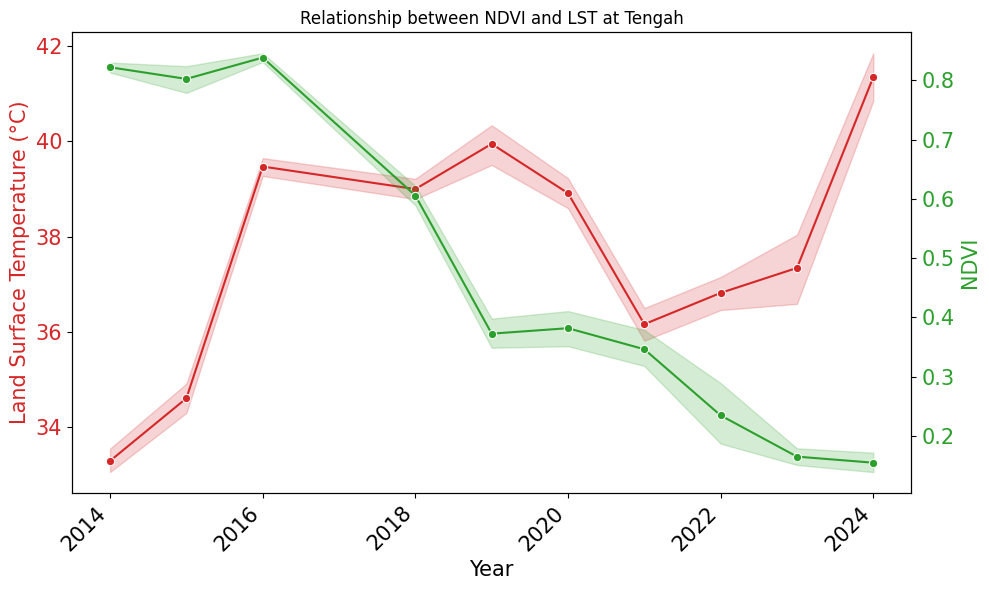

In [55]:
plot_yearly_avg_lst_ndvi(r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\Tengah_cc30.csv", 'Tengah')

In [ ]:
# Source: https://www.nss.org.sg/report/880ca04a-cNSS%20Position%20on%20the%20HDB%20Tengah%20Forest%20Town%20Development.pdf
# Was clearing since 2018